In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as sp_dist

In [11]:
DIR = "data/"

In [12]:
# Manhattan distance
d  = lambda p1, p2: np.linalg.norm(p1 - p2, ord=1) # Compare two points
dM = lambda v1, v2: sp_dist.cdist(v1, v2, metric='cityblock') # Distance matrix 

In [13]:
def loadRequest(request):
    data = []
    file = open(request)
    for line in file:
        data.append(list(map(int, line.strip().replace("-", " ").split())))
    file.close()
    return np.array(data)

In [14]:
def plotPositions(manana, tarde, noche):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16, 5))
    ax1.scatter(manana[:,0], manana[:,1], c='y')
    ax2.scatter(tarde[:,0], tarde[:,1], c='r')
    ax3.scatter(noche[:,0], noche[:,1], c='k')
    ax1.set_title("Mañana")
    ax2.set_title("Tarde")
    ax3.set_title("Noche")
    plt.show()

In [15]:
# Load positions
manana = np.loadtxt(DIR + 'manana.dat', dtype=int)
tarde = np.loadtxt(DIR + 'tarde.dat', dtype=int)
noche = np.loadtxt(DIR + 'noche.dat', dtype=int)

In [17]:
# Load requests
req_1 = loadRequest(DIR + 'requests_1.dat')

In [133]:
x_hash = map(tuple, manana)
len(manana) == len(set(x_hash))

True

In [133]:
def greedy(uber, request):
    T = 12001
    cand = np.copy(uber)
    costs = np.zeros(T)
    for t in range(T):#1201):
        pos = np.where(request[:,4] == t)
        req = request[:,:4]
        req_t = req[pos]
        if len(req_t) > 0 and len(cand) > 0:
            # Distance matrix between ubers and requests
            dist = dM(cand, req_t[:,:2])
            # The same using loops
            #dist = np.zeros((len(uber), len(req_t)))
            #for i in range(len(uber)):
            #    for j in range(len(req_t)):
            #        dist[i, j] = d(uber[i], req_t[j,:2])
            # for j in range(len(req_t)):
            #    min_pos = np.argmin(dist[:,j])
                #print(cand[min_pos], dist[min_pos, j], d(req_t[j,:2], req_t[j,2:4]))
            #ind = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
            min_pos = np.argmin(dist, axis=0)
            #cand = np.delete(cand, min_pos, axis=0) # Remove uber 
            #print(cand)
            
            costs[t] = np.sum(dist[min_pos]) + sum([d(req_t[j,:2], req_t[j,2:4]) for j in range(len(req_t))])
            #print(min_pos)
            #print(req_t)
    return cost

In [134]:
costs = greedy(manana, req_1)

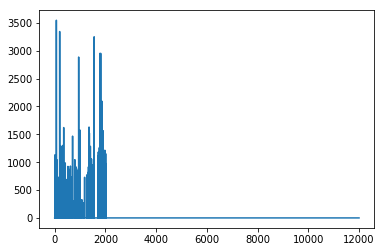

In [135]:
plt.plot(np.arange(len(cost)), cost)
plt.show()

In [50]:
greedy(manana, req_1)

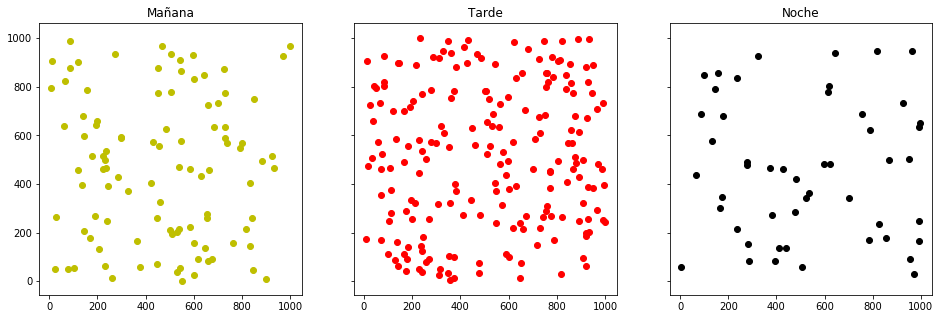

In [53]:
plotPositions(manana, tarde, noche)

In [54]:
d(manana[0], manana[1])

244.0